In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import SimpleITK as sitk
from pathlib import Path
from platipy.imaging.registration.utils import apply_transform
from platipy.imaging import ImageVisualiser
from platipy.imaging.label.utils import get_com
from shrimpy.augmentation import random_augmentation_transform,  generate_random_vector_field_transform
from shrimpy.pipeline import read_augment_write, read_augment_write_directory
from shrimpy.intensity import randomly_augment_image_intensity, apply_noise
import matplotlib.pyplot as plt

In [3]:
example_T1 = sitk.ReadImage("CONVERTED_PROCESSED/ACRIN-6698-102212/IMG_T1.nii.gz", sitk.sitkFloat64)
# example_T2 = sitk.ReadImage("CONVERTED_PROCESSED/ACRIN-6698-102212/IMG_T2.nii.gz", sitk.sitkFloat64)
# example_contour = sitk.ReadImage("CONVERTED_PROCESSED/ACRIN-6698-102212/MASK_TUMOUR.nii.gz")
# augmented_T1 = sitk.ReadImage("AUGMENTATIONS_TEST/ACRIN-6698-102212_AUG-0000/IMG_T1.nii.gz", sitk.sitkFloat64)
# augmented_T2 = sitk.ReadImage("AUGMENTATIONS_TEST/ACRIN-6698-102212_AUG-0000/IMG_T2.nii.gz", sitk.sitkFloat64)
# augmented_contour = sitk.ReadImage("AUGMENTATIONS_TEST/ACRIN-6698-102212_AUG-0000/MASK_TUMOUR.nii.gz")

In [ ]:
print(example_T1)

In [64]:
transform2 = generate_random_vector_field_transform(example_T1, maximum_displacements_mm=(1, 1, 1), peak_count=1000, peak_width_mm=(50, 50, 50))

alt_augmented_image2 = apply_transform(example_T1, example_T1, transform)

generating and caching new kernel
generating peaks:


  0%|          | 0/1000 [00:00<?, ?it/s]

In [72]:
field = (transform2.GetDisplacementField())
new_field = sitk.GetImageFromArray(sitk.GetArrayFromImage(field)*2)
new_field.CopyInformation(field)
transform2.SetDisplacementField(new_field)

In [23]:
help(apply_transform)

Help on function apply_transform in module platipy.imaging.registration.utils:

apply_transform(input_image, reference_image=None, transform=None, default_value=0, interpolator=1)
    Transform a volume of structure with the given deformation field.
    
    Args
        input_image (SimpleITK.Image): The image, to which the transform is applied
        reference_image (SimpleITK.Image): The image will be resampled into this reference space.
        transform (SimpleITK.Transform): The transformation
        default_value: Default (background) value. Defaults to 0.
        interpolator (int, optional): The interpolation order.
                                Available options:
                                    - SimpleITK.sitkNearestNeighbor
                                    - SimpleITK.sitkLinear
                                    - SimpleITK.sitkBSpline
                                Defaults to SimpleITK.sitkNearestNeighbor
    
    Returns
        (SimpleITK.Image): the trans

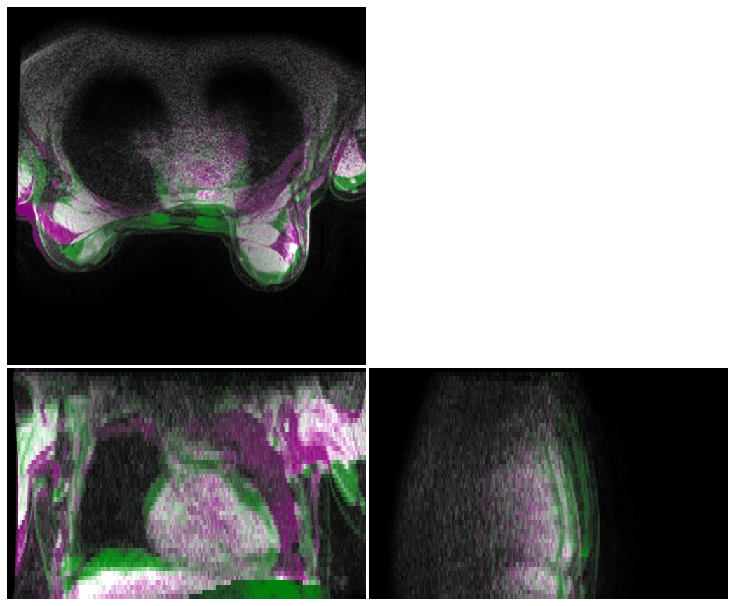

In [75]:
display_image = apply_transform(example_T1, example_T1, transform2, interpolator=sitk.sitkLinear)

vis = ImageVisualiser(example_T1, figure_size_in=10)
vis.add_comparison_overlay(display_image)
# vis.add_vector_overlay(transform2.GetDisplacementField(), arrow_scale=1, subsample=8)
fig = vis.show()
# vis = ImageVisualiser(display_image, figure_size_in=5)
# fig = vis.show()

In [108]:
# field = transform2.GetDisplacementField()
# inv_field = sitk.InvertDisplacementField(field)
# print(sum((sitk.GetArrayFromImage(inv_field)!=0).flatten()))
# jac_det = sitk.DisplacementFieldJacobianDeterminant(inv_field)
print(sum((sitk.GetArrayFromImage(jac_det)<0).flatten())/len(sitk.GetArrayFromImage(jac_det).flatten()))

0.013309097290039063


In [82]:
help(vis.add_scalar_overlay)

Help on method add_scalar_overlay in module platipy.imaging.visualisation.visualiser:

add_scalar_overlay(scalar_image, name=None, colormap=<matplotlib.colors.LinearSegmentedColormap object at 0x000001F50C4EA850>, alpha=0.75, min_value=False, max_value=False, discrete_levels=False, mid_ticks=False, show_colorbar=True, norm=None, projection=False) method of platipy.imaging.visualisation.visualiser.ImageVisualiser instance
    Overlay a scalar image on to the existing image
    
    Args:
        scalar_image sitk.Image|dict): Scalar image or dict containing scalar images.
        name (str, optional): Name to give the scalar image (only used if passing sitk.Image as
                              scalar image). Defaults to None.
        colormap (matplotlib.colors.Colormap, optional): The colormap to be used when
                                                         overlaying this scalar image. Defaults
                                                         to plt.cm.get_cmap("Spec

In [105]:
doot = abs(jac_det)+jac_det

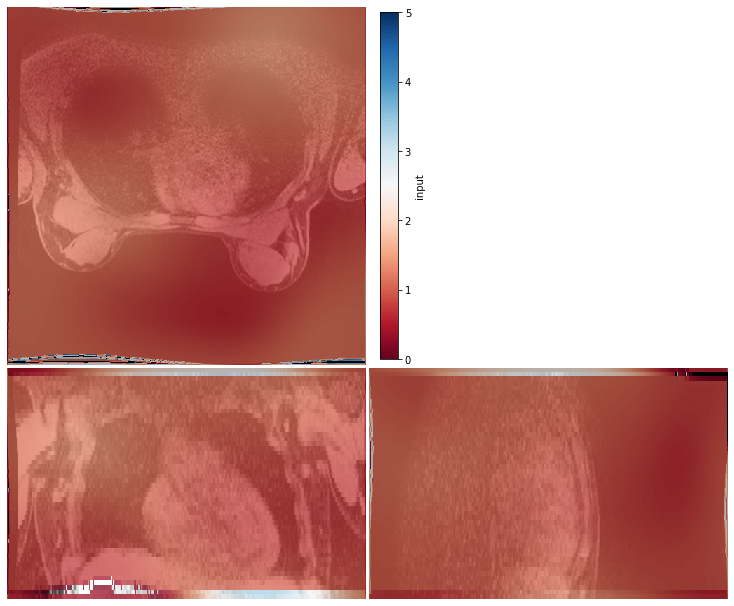

In [112]:
vis = ImageVisualiser(example_T1, figure_size_in=10)
vis.add_scalar_overlay(jac_det, colormap=plt.cm.RdBu, min_value=0, max_value=5)
fig = vis.show()

In [4]:
print(50*512*512)

13107200


In [41]:
# test_T1 = randomly_augment_image_intensity(example_T1, 2, 0.2)
test_T1 = apply_noise(image=example_T1, sigma=100)
# test_T2 = apply_noise(image=example_T2, sigma=7.5)

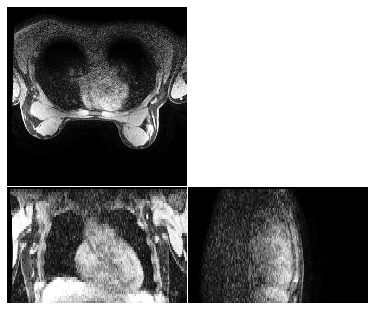

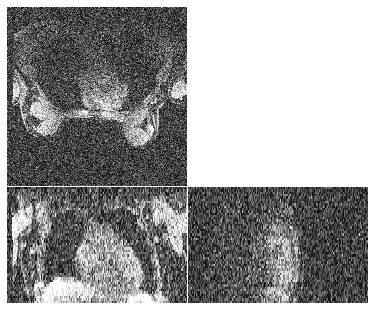

In [42]:
vis = ImageVisualiser(example_T1, figure_size_in=5)
fig = vis.show()
vis = ImageVisualiser(test_T1, figure_size_in=5)
fig = vis.show()

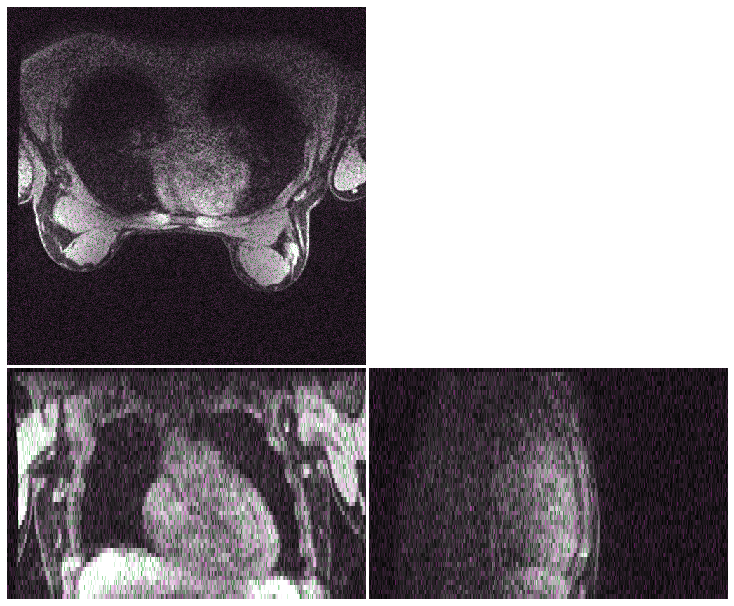

In [43]:
vis = ImageVisualiser(example_T1)
vis.add_comparison_overlay(test_T1)
fig = vis.show()

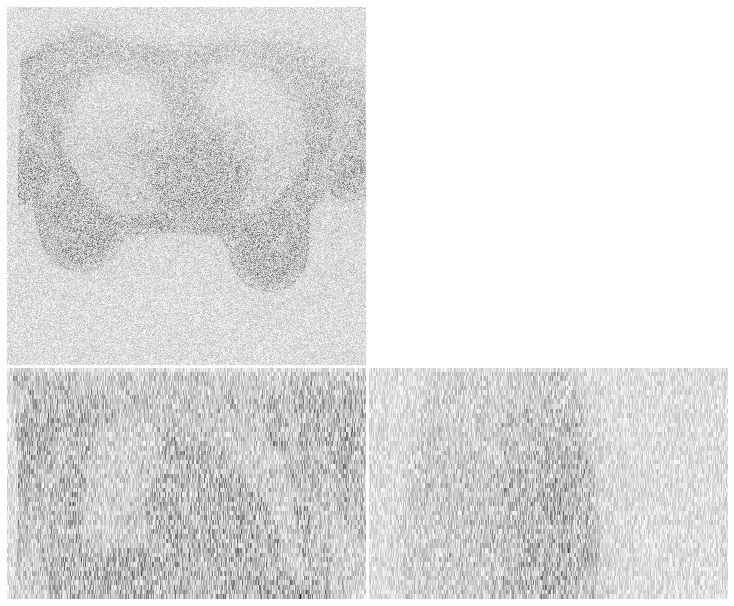

In [47]:
dif_img = +test_T1-example_T1
vis = ImageVisualiser(dif_img)
fig = vis.show()

In [8]:
raise RuntimeError()

RuntimeError: 

In [5]:
patients_directory = "artemis_simulation/local/DATA"
augmentations_directory = "AUGMENTATIONS_TEST2"
number_of_augmentations_per_patient = 2
read_augment_write_directory(patients_directory, augmentations_directory, number_of_augmentations_per_patient, replace_existing=False)

Full patient augmentation in 0.49s
Full patient augmentation in 0.50s
Full patient augmentation in 0.39s
Full patient augmentation in 0.56s
Full patient augmentation in 0.63s


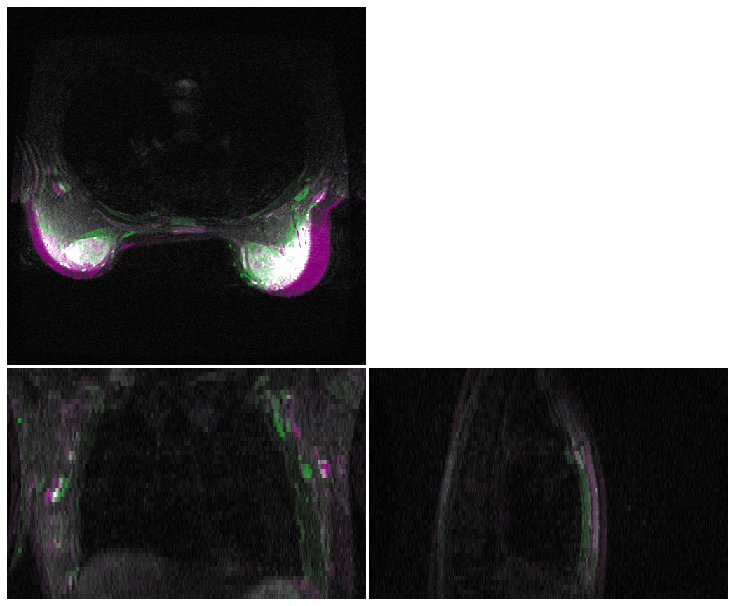

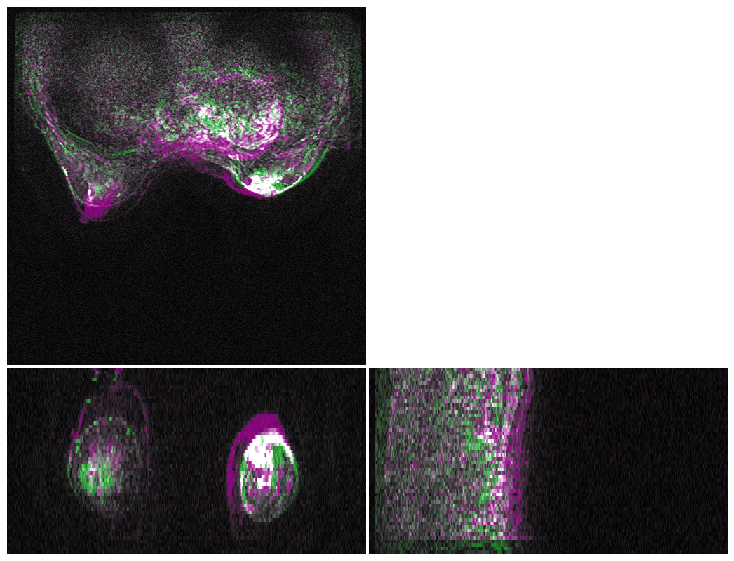

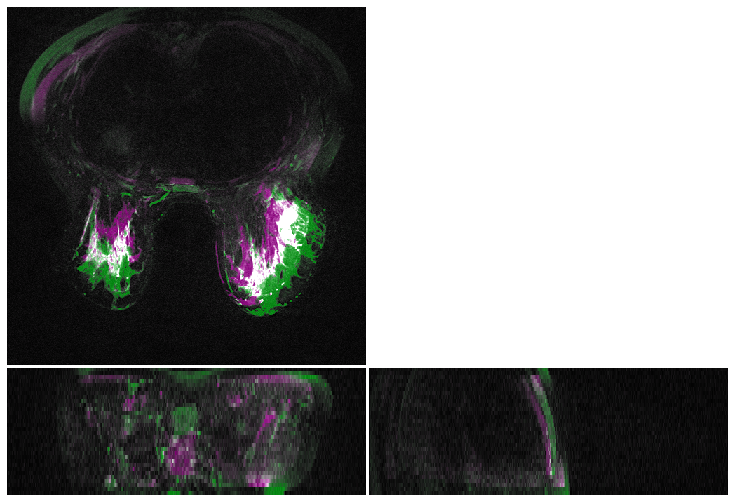

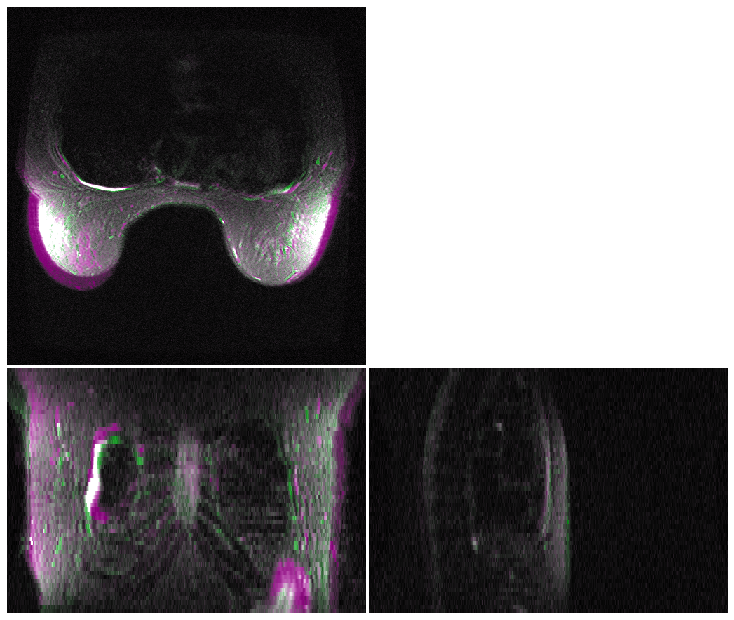

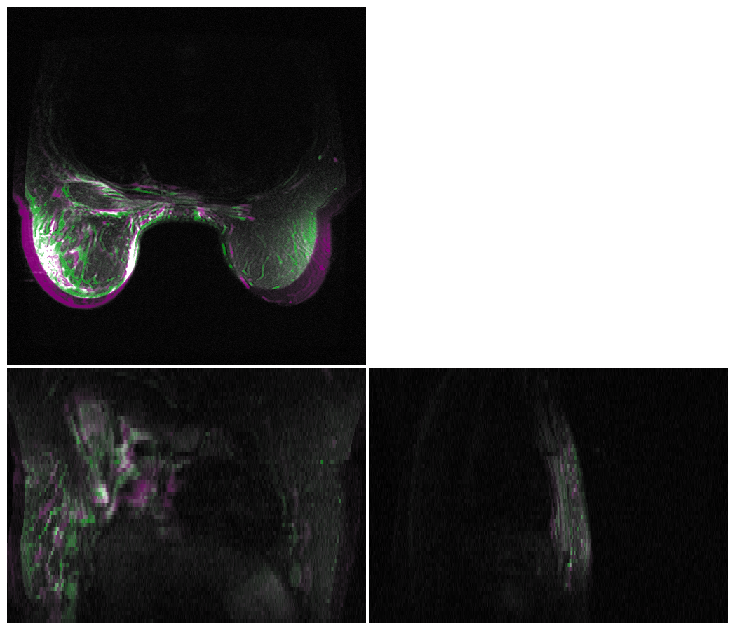

In [4]:
patient_names = ["ACRIN-6698-102212", "ACRIN-6698-103939", "ACRIN-6698-104268", "ACRIN-6698-107700", "ACRIN-6698-116603"]
modality = "IMG_T2.nii.gz"
for patient_name in patient_names:
    patient_image = sitk.ReadImage("CONVERTED_PROCESSED/"+patient_name+"/"+modality)
    augmented_image = sitk.ReadImage("AUGMENTATIONS_TEST/"+patient_name+"_AUG-0000/"+modality)
    vis = ImageVisualiser(patient_image, figure_size_in=10)
    vis.add_comparison_overlay(augmented_image)
    vis.show()